                                            links
title                                            
Amit Agarwal               http://www.labnol.org/
Jyotsna Kamat  http://www.kamat.com/jyotsna/blog/
Amit Varma             http://www.indiauncut.com/
Sidin Vadukut              http://www.whatay.com/
Hawkeye           http://hawkeyeview.blogspot.in/
363 rows written
{'blogspot': 106, 'wordpress': 49, 'others': 208}


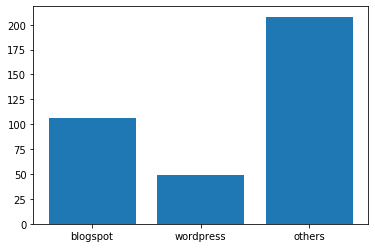

In [14]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import re
import matplotlib.pyplot as plt

url='https://indianbloggers.org/'
content = requests.get(url).text



#initalizing an empty dictionary that would be written as Pandas Dataframe and then CSV
d = {'title':[],'links':[]}

#initializing blog hosting category
cat = {'blogspot':0,'wordpress':0,'others':0}


soup = BeautifulSoup(content, "html.parser")


for link in soup.find_all('a',):
    if len(link.text.strip()) > 1 and bool(re.match('^http',link['href'])) and not bool(re.search('indianbloggers|twitter|facebook',link['href'])):
        d['title'].append(link.text)
        d['links'].append(link['href'])
        #finding the blog hosting type
        if re.search('blogspot',link['href']):
            cat['blogspot']+=1
        elif re.search('wordpress',link['href']):
            cat['wordpress']+=1
        else:
            cat['others']+=1
        #d['len'].append(len(link.text.strip()))
    
blog_list = pd.DataFrame(d).set_index('title')


print(blog_list.head())

blog_list.to_csv('blog_list.csv', encoding='utf-8')

print(str(len(blog_list.index))+' rows written')

print(cat)

#plotting the blog hosting type 

plt.bar(range(len(cat)), cat.values(), align='center')
plt.xticks(range(len(cat)), cat.keys())

plt.show()